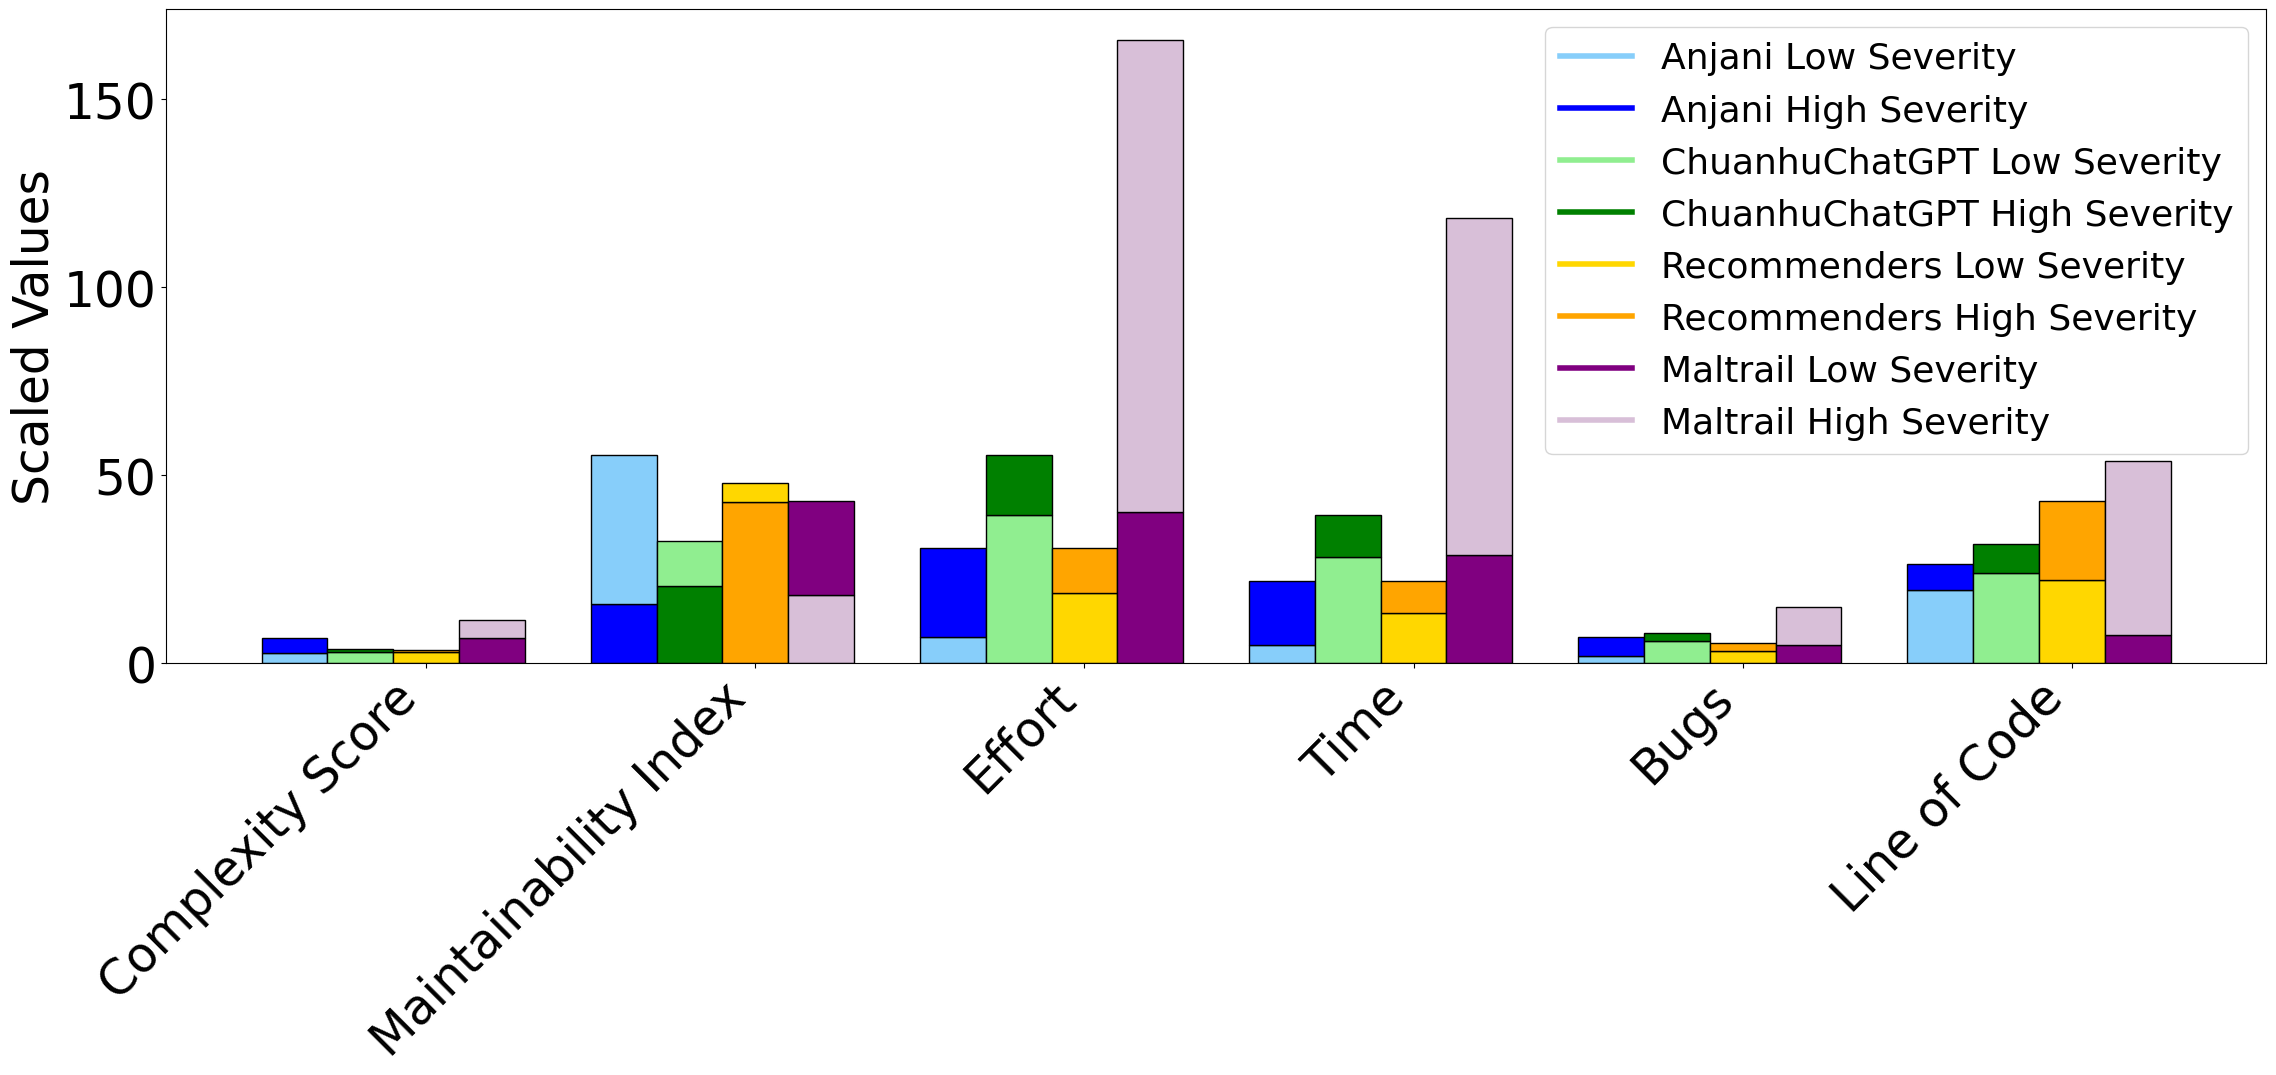

In [3]:
####bar chart

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set global font sizes
plt.rcParams.update({
    'font.size': 48,  # Base font size
    'axes.titlesize': 38,  # Title font size
    'axes.labelsize': 35,  # Axis labels font size
    'xtick.labelsize': 35,  # X-axis tick font size
    'ytick.labelsize': 35,  # Y-axis tick font size
    'legend.fontsize': 26,  # Legend font size
    'figure.titlesize': 40  # Overall figure title size
})

# Load the data
df = pd.read_excel("/content/drive/MyDrive/Severity Factor_Aditi/Writing/result/merged/EXPERIMENT RESULT/2group_relation.xlsx")

# Metrics to compare
metrics = ['complexity_score', 'maintainability_index', 'effort', 'time', 'bugs', 'comments']
labels = ['Complexity Score', 'Maintainability Index', 'Effort', 'Time', 'Bugs', 'Line of Code']

# Scaling values for specific metrics
scaling_factors = {
    'effort': 450,
    'time': 35,
    'bugs': 10
}

# Apply scaling to the metrics
df['effort'] = df['effort'] / scaling_factors['effort']
df['time'] = df['time'] / scaling_factors['time']
df['bugs'] = df['bugs'] * scaling_factors['bugs']

# Use the correct column name for risk groups
risk_column = 'Risk_Group'  # Adjust this if the column name is different

# Filter projects and data
projects = ['Anjani', 'ChuanhuChatGPT', 'recommenders', 'maltrail']
project_data = {project: df[df['Version'].str.contains(project, case=False)] for project in projects}

# Define colors for bars
color_mapping = {
    'Anjani_Low': '#87CEFA',  # Light Blue
    'Anjani_High': '#0000FF',  # Deep Blue
    'ChuanhuChatGPT_Low': '#90EE90',  # Light Green
    'ChuanhuChatGPT_High': '#008000',  # Deep Green
    'recommenders_Low': '#FFD700',  # Light Yellow
    'recommenders_High': '#FFA500',  # Orange
    'maltrail_Low': '#800080',  # Purple
    'maltrail_High': '#D8BFD8'  # Light Purple
}

# Initialize the plot
fig, ax = plt.subplots(figsize=(24, 12))  # Increased figure size for readability
x = np.arange(len(metrics))  # Number of metrics
width = 0.2  # Width of each bar

# Plot merged bars for all projects
for i, project in enumerate(projects):
    low_risk = project_data[project][project_data[project][risk_column] == 'Low'][metrics].mean()
    high_risk = project_data[project][project_data[project][risk_column] == 'Severe'][metrics].mean()

    for j, metric in enumerate(metrics):
        low_value = low_risk[metric]
        high_value = high_risk[metric]

        # Determine lower and upper portions
        if low_value < high_value:
            lower_value = low_value
            upper_value = high_value - low_value
            lower_color = color_mapping[f"{project}_Low"]
            upper_color = color_mapping[f"{project}_High"]
        else:
            lower_value = high_value
            upper_value = low_value - high_value
            lower_color = color_mapping[f"{project}_High"]
            upper_color = color_mapping[f"{project}_Low"]

        # Plot the lower portion
        ax.bar(x[j] + i * width - width, lower_value, width,
               color=lower_color, edgecolor='black')

        # Plot the upper portion
        ax.bar(x[j] + i * width - width, upper_value, width,
               bottom=lower_value, color=upper_color, edgecolor='black')

# Customize the chart
ax.set_xticks(x + width)  # Center x-ticks for grouped bars
ax.set_xticklabels(labels, rotation=45, ha='right')
#ax.set_title("Metrics Comparison for All Projects (Low and High Severity)", pad=20)
ax.set_ylabel("Scaled Values")
ax.tick_params(axis='both', which='major')

# Legend inside the plot
legend_elements = [
    plt.Line2D([0], [0], color=color_mapping['Anjani_Low'], lw=4, label='Anjani Low Severity'),
    plt.Line2D([0], [0], color=color_mapping['Anjani_High'], lw=4, label='Anjani High Severity'),
    plt.Line2D([0], [0], color=color_mapping['ChuanhuChatGPT_Low'], lw=4, label='ChuanhuChatGPT Low Severity'),
    plt.Line2D([0], [0], color=color_mapping['ChuanhuChatGPT_High'], lw=4, label='ChuanhuChatGPT High Severity'),
    plt.Line2D([0], [0], color=color_mapping['recommenders_Low'], lw=4, label='Recommenders Low Severity'),
    plt.Line2D([0], [0], color=color_mapping['recommenders_High'], lw=4, label='Recommenders High Severity'),
    plt.Line2D([0], [0], color=color_mapping['maltrail_Low'], lw=4, label='Maltrail Low Severity'),
    plt.Line2D([0], [0], color=color_mapping['maltrail_High'], lw=4, label='Maltrail High Severity'),
]
ax.legend(handles=legend_elements, loc='upper right')

# Adjust y-axis to prevent lines below 0
ax.set_ylim(0)

# Save the chart as a PDF
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Severity Factor_Aditi/Writing/result/all_projects_merged_bar_chart.pdf")
plt.show()


In [4]:
###radar chart

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import os

# Load the data
df = pd.read_excel("/content/drive/MyDrive/Severity Factor_Aditi/Writing/result/merged/EXPERIMENT RESULT/2group_relation.xlsx")

# Metrics to plot and corresponding labels
metrics = ['complexity_score', 'maintainability_index', 'effort', 'time', 'bugs', 'comments']
labels = ['Complexity Score', 'Maintainability Index', 'Effort', 'Time', 'Bugs', 'comments']

# Scale 'effort' and 'time' for visualization
df['effort'] = df['effort'] / 450
df['time'] = df['time'] / 15

# Get unique project names
projects = df['Version'].apply(lambda x: x.split('-')[0]).unique()

# Directory to save plots
output_dir = "/content/drive/MyDrive/Severity Factor_Aditi/Writing/result/Plots_PDF"
os.makedirs(output_dir, exist_ok=True)

# Generate radar chart for each project
for project in projects:
    # Filter data for the current project
    project_df = df[df['Version'].str.contains(project)]

    # Calculate mean values for each metric for both risk groups
    low_risk = project_df[project_df['Risk_Group'] == 'Low'][metrics].mean()
    severe_risk = project_df[project_df['Risk_Group'] == 'Severe'][metrics].mean()

    # Set up the radar chart
    num_vars = len(metrics)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]  # Complete the circle

    # Radar chart setup
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    # Plot Low Risk group
    values_low = low_risk.tolist()
    values_low += values_low[:1]
    ax.plot(angles, values_low, color='blue', linewidth=2, linestyle='solid', label='Low Risk')
    ax.fill(angles, values_low, color='blue', alpha=0.25)

    # Plot Severe Risk group
    values_severe = severe_risk.tolist()
    values_severe += values_severe[:1]
    ax.plot(angles, values_severe, color='red', linewidth=2, linestyle='solid', label='Severe Risk')
    ax.fill(angles, values_severe, color='red', alpha=0.25)

    # Customize the chart
    ax.set_yticks([10, 20, 30, 40, 50])
    ax.set_yticklabels(['10', '20', '30', '40', '50'], color="grey", size=10)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)  # Use custom labels here
    ax.set_title(f"Metrics Comparison for Low and Severe Risk Groups ({project} Project)\n*Effort scaled by 450, Time scaled by 15", pad=20)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    # Save the plot as PDF
    output_file = os.path.join(output_dir, f"{project}_radar_chart.pdf")
    plt.savefig(output_file, format='pdf')
    print(f"Saved: {output_file}")

    # Close the plot to free memory
    plt.close(fig)


Saved: /content/drive/MyDrive/Severity Factor_Aditi/Writing/result/Plots_PDF/Anjani_radar_chart.pdf
Saved: /content/drive/MyDrive/Severity Factor_Aditi/Writing/result/Plots_PDF/ChuanhuChatGPT_radar_chart.pdf
Saved: /content/drive/MyDrive/Severity Factor_Aditi/Writing/result/Plots_PDF/deep_radar_chart.pdf
Saved: /content/drive/MyDrive/Severity Factor_Aditi/Writing/result/Plots_PDF/maltrail_radar_chart.pdf
Saved: /content/drive/MyDrive/Severity Factor_Aditi/Writing/result/Plots_PDF/recommenders_radar_chart.pdf


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import os

# Load the data
df = pd.read_excel("/content/drive/MyDrive/Severity Factor_Aditi/Writing/result/merged/EXPERIMENT RESULT/2group_relation.xlsx")

# Metrics to plot and corresponding labels
metrics = ['complexity_score', 'maintainability_index', 'effort', 'time', 'bugs', 'comments']
labels = ['Complexity Score', 'Maintainability Index', 'Effort', 'Time', 'Bugs', 'Line of Code']

# Scale 'effort' and 'time' for visualization
df['effort'] = df['effort'] / 1200
df['time'] = df['time'] / 100
df['comments'] = df['comments'] / 10
# Get unique project names
projects = df['Version'].apply(lambda x: x.split('-')[0]).unique()

# Directory to save plots
output_dir = "/content/drive/MyDrive/Severity Factor_Aditi/Writing/result/Plots"
os.makedirs(output_dir, exist_ok=True)

# Generate radar chart for each project
for project in projects:
    # Filter data for the current project
    project_df = df[df['Version'].str.contains(project)]

    # Calculate mean values for each metric for both risk groups
    low_risk = project_df[project_df['Risk_Group'] == 'Low'][metrics].mean()
    severe_risk = project_df[project_df['Risk_Group'] == 'Severe'][metrics].mean()

    # Set up the radar chart
    num_vars = len(metrics)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]  # Complete the circle

    # Radar chart setup
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    # Plot Low Risk group
    values_low = low_risk.tolist()
    values_low += values_low[:1]
    ax.plot(angles, values_low, color='blue', linewidth=2, linestyle='solid', label='Low Risk')
    ax.fill(angles, values_low, color='blue', alpha=0.25)

    # Plot Severe Risk group
    values_severe = severe_risk.tolist()
    values_severe += values_severe[:1]
    ax.plot(angles, values_severe, color='red', linewidth=2, linestyle='solid', label='Severe Risk')
    ax.fill(angles, values_severe, color='red', alpha=0.25)

    # Customize the chart
    ax.set_yticks([10, 20, 30, 40, 50])
    ax.set_yticklabels(['10', '20', '30', '40', '50'], color="grey", size=10)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)  # Use custom labels here
    ax.set_title(f"Metrics Comparison for Low and Severe Risk Groups ({project} Project)\n*Effort scaled down by 1200, Time scaled down by 100, Bugs scaled up by 10", pad=20)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 0.1))

    # Save the plot
    output_file = os.path.join(output_dir, f"{project}_radar_chart.png")
    plt.savefig(output_file, format='png')
    print(f"Saved: {output_file}")

    # Close the plot to free memory
    plt.close(fig)


Saved: /content/drive/MyDrive/Severity Factor_Aditi/Writing/result/Plots/Anjani_radar_chart.png
Saved: /content/drive/MyDrive/Severity Factor_Aditi/Writing/result/Plots/ChuanhuChatGPT_radar_chart.png
Saved: /content/drive/MyDrive/Severity Factor_Aditi/Writing/result/Plots/deep_radar_chart.png
Saved: /content/drive/MyDrive/Severity Factor_Aditi/Writing/result/Plots/maltrail_radar_chart.png
Saved: /content/drive/MyDrive/Severity Factor_Aditi/Writing/result/Plots/recommenders_radar_chart.png
